In [1]:
import pandas as pd
data = pd.read_csv('data.csv',encoding='utf-8')

In [2]:
data.head()

,text,ctext
0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [3]:
data = data.head(100)

In [4]:
data.columns = ['text','summary']

In [5]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(row):
    row = re.sub("(\\t)", " ", str(row)).lower()
    row = re.sub("(\\r)", " ", str(row)).lower()
    row = re.sub("(\\n)", " ", str(row)).lower()

    # Remove _ if it occurs more than one time consecutively
    row = re.sub("(__+)", " ", str(row)).lower()

    # Remove - if it occurs more than one time consecutively
    row = re.sub("(--+)", " ", str(row)).lower()

    # Remove ~ if it occurs more than one time consecutively
    row = re.sub("(~~+)", " ", str(row)).lower()

    # Remove + if it occurs more than one time consecutively
    row = re.sub("(\+\++)", " ", str(row)).lower()

    # Remove . if it occurs more than one time consecutively
    row = re.sub("(\.\.+)", " ", str(row)).lower()

    # Remove the characters - <>()|&©ø"',;?~*!
    row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

    # Remove mailto:
    row = re.sub("(mailto:)", " ", str(row)).lower()

    # Remove \x9* in text
    row = re.sub(r"(\\x9\d)", " ", str(row)).lower()

    # Replace INC nums to INC_NUM
    row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

    # Replace CM# and CHG# to CM_NUM
    row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

    # Remove punctuations at the end of a word
    row = re.sub("(\.\s+)", " ", str(row)).lower()
    row = re.sub("(\-\s+)", " ", str(row)).lower()
    row = re.sub("(\:\s+)", " ", str(row)).lower()

    # Replace any url to only the domain name
    try:
        url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
        repl_url = url.group(3)
        row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
    except:
        pass

    # Remove multiple spaces
    row = re.sub("(\s+)", " ", str(row)).lower()

    # Remove the single character hanging between any two spaces
    row = re.sub("(\s+.\s+)", " ", str(row)).lower()
    return row

In [6]:
data['cleaned_text'] = data['text'].apply(text_strip)
data['cleaned_summary'] = data['summary'].apply(text_strip)

In [7]:
data['cleaned_summary']

0     syrian official obama climbed to the top of th...
1     usain bolt wins third gold of world championsh...
2     the employee in agency kansas city office is a...
3     new canadian doctor says she was part of team ...
4     another arrest made in gang rape outside calif...
                            ...                        
95    he was released early after time off for good ...
96    you don have to sit down to get great food in ...
97    philip rubio says the u.s postal service threa...
98    a cnn analysis of secret cables published by w...
99     as they see em is in-depth look at baseball u...
Name: cleaned_summary, Length: 100, dtype: object

In [8]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x: '_START_ '+ str(x) + ' _END_')

In [9]:
data['cleaned_summary']

0     _START_ syrian official obama climbed to the t...
1     _START_ usain bolt wins third gold of world ch...
2     _START_ the employee in agency kansas city off...
3     _START_ new canadian doctor says she was part ...
4     _START_ another arrest made in gang rape outsi...
                            ...                        
95    _START_ he was released early after time off f...
96    _START_ you don have to sit down to get great ...
97    _START_ philip rubio says the u.s postal servi...
98    _START_ a cnn analysis of secret cables publis...
99    _START_  as they see em is in-depth look at ba...
Name: cleaned_summary, Length: 100, dtype: object

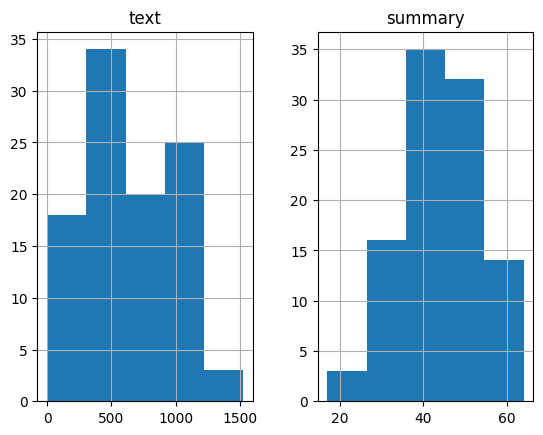

In [10]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for sent in data['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in data['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 5)
plt.show()

In [11]:
# Check how much % of text have 0-100 words
cnt = 0
for i in data['cleaned_text']:
    if len(i.split()) <= 1500:
        cnt = cnt + 1
print(cnt / len(data['cleaned_text']))

0.99


In [12]:
# Check how much % of text have 0-100 words
cnt = 0
for i in data['cleaned_summary']:
    if len(i.split()) <= 75:
        cnt = cnt + 1
print(cnt / len(data['cleaned_summary']))

1.0


In [13]:
# Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len = 1500
max_summary_len = 75

In [14]:
import numpy as np

cleaned_text = np.array(data['cleaned_text'])
cleaned_summary= np.array(data['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

post_pre.head(2)

,text,summary
0,it official u.s president barack obama wants l...,_START_ syrian official obama climbed to the t...
1,cnn usain bolt rounded off the world champion...,_START_ usain bolt wins third gold of world ch...


In [15]:
# Add sostok and eostok

post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_pre.head(2)

,text,summary
0,it official u.s president barack obama wants l...,sostok _START_ syrian official obama climbed t...
1,cnn usain bolt rounded off the world champion...,sostok _START_ usain bolt wins third gold of w...


In [16]:
post_pre.shape

(99, 2)

In [17]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(post_pre["text"]),
    np.array(post_pre["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [19]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  79.56852791878173


In [20]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 1933


In [21]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 94.41624365482234
Size of vocabulary in Y = 100


In [22]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [23]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
latent_dim = 100
embedding_dim = 100

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1500, 100)    193300      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 1500, 100),  80400       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [26]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [29]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=2,
    callbacks=[es],
    batch_size=32,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/2
3/3 [==============================] - 85s 28s/step - loss: 1.3863 - val_loss: 1.1761
Epoch 2/2
3/3 [==============================] - 86s 29s/step - loss: 1.3129 - val_loss: 1.1315


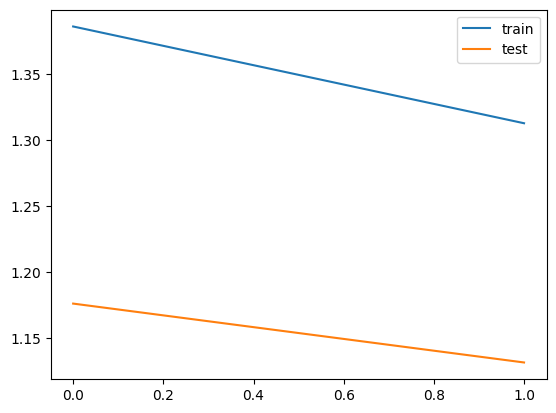

In [30]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [43]:
reverse_target_word_index

{1: 'the',
 2: 'in',
 3: 'start',
 4: 'end',
 5: 'sostok',
 6: 'to',
 7: 'eostok',
 8: 'of',
 9: 'and',
 10: 'is',
 11: 'says',
 12: 'for',
 13: 'on',
 14: 'new',
 15: 'u',
 16: 'was',
 17: 'with',
 18: 'has',
 19: 'are',
 20: 's',
 21: 'will',
 22: 'he',
 23: 'at',
 24: 'it',
 25: 'have',
 26: 'be',
 27: 'his',
 28: 'by',
 29: 'been',
 30: 'not',
 31: 'an',
 32: 'but',
 33: 'she',
 34: 'a',
 35: 'as',
 36: 'this',
 37: 'from',
 38: 'say',
 39: 'had',
 40: 'law',
 41: 'cnn',
 42: 'more',
 43: 'one',
 44: 'that',
 45: 'they',
 46: 'world',
 47: 'were',
 48: 'there',
 49: 'year',
 50: 'or',
 51: 'obama',
 52: 'military',
 53: 'two',
 54: 'no',
 55: 'also',
 56: 'can',
 57: 'police',
 58: 'could',
 59: 'former',
 60: 'time',
 61: 'some',
 62: 'made',
 63: 'official',
 64: 'american',
 65: 'if',
 66: 'state',
 67: 'court',
 68: 'best',
 69: 'people',
 70: 'who',
 71: 'syria',
 72: 'isis',
 73: 'all',
 74: 'against',
 75: 'n',
 76: 'part',
 77: 'countries',
 78: 'after',
 79: 'than',
 80: '

In [32]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [39]:
reverse_target_word_index

{1: 'the',
 2: 'in',
 3: 'start',
 4: 'end',
 5: 'sostok',
 6: 'to',
 7: 'eostok',
 8: 'of',
 9: 'and',
 10: 'is',
 11: 'says',
 12: 'for',
 13: 'on',
 14: 'new',
 15: 'u',
 16: 'was',
 17: 'with',
 18: 'has',
 19: 'are',
 20: 's',
 21: 'will',
 22: 'he',
 23: 'at',
 24: 'it',
 25: 'have',
 26: 'be',
 27: 'his',
 28: 'by',
 29: 'been',
 30: 'not',
 31: 'an',
 32: 'but',
 33: 'she',
 34: 'a',
 35: 'as',
 36: 'this',
 37: 'from',
 38: 'say',
 39: 'had',
 40: 'law',
 41: 'cnn',
 42: 'more',
 43: 'one',
 44: 'that',
 45: 'they',
 46: 'world',
 47: 'were',
 48: 'there',
 49: 'year',
 50: 'or',
 51: 'obama',
 52: 'military',
 53: 'two',
 54: 'no',
 55: 'also',
 56: 'can',
 57: 'police',
 58: 'could',
 59: 'former',
 60: 'time',
 61: 'some',
 62: 'made',
 63: 'official',
 64: 'american',
 65: 'if',
 66: 'state',
 67: 'court',
 68: 'best',
 69: 'people',
 70: 'who',
 71: 'syria',
 72: 'isis',
 73: 'all',
 74: 'against',
 75: 'n',
 76: 'part',
 77: 'countries',
 78: 'after',
 79: 'than',
 80: '

In [40]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
#         print(output_tokens[0, -1, :])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        print(sampled_token_index)
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [41]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [42]:
for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_text_len)))
    print ('\n')

Review: cnn space shuttle discovery launched just before friday on mission to the international space station space shuttle discovery off late friday from space center in from the of seven includes one from mexico and another from one of those seven will remain on the station as flight while is to return home the shuttle also on the science and the treadmill colbert named for colbert of central the colbert report colbert won an online poll by nasa to name the space station but colbert and the space agency to give the to the treadmill the new was given the name nasa said the treadmill is an essential addition to the space station watch shuttle we have the treadmill now to keep them which is really part of being able to come home in one piece so it is an essential part said com discovery night discovery set for tuesday had been three times first for bad and twice more while mission out of 
Original summary: start is to to with of also end 
3
3
3
3
1
1
0


KeyError: 0